# Cleaning data in Python 


* NaN : not a number -- special floating-point value
* Working with duplicates and missing values
    * isnull()
    * notnull()
    * dropna()
    * fillna()
    * replace()
* Which values should be replaced with missing values based on data identifying and eliminating outliers
* Dropping duplicate data


[employee dataset](https://raw.githubusercontent.com/APSSDC-Data-Analysis/DataAnalysis-batch4/master/Datasets/employe.csv)

# Working with Missing Values 

In [1]:
import pandas as pd

In [4]:
di = {
    "Name" : pd.Series(["Divya", "Balachandra", "Shaik","Jeelan"], index = [1,2,3,4]),
    "Gender" : pd.Series(["F","M", "M"], index = [1,3,4]),
    "Number" : pd.Series([890,789,678], index = [2,3,4]),
    "Color" : pd.Series(["Green", "Black"], index = [2,4])
}
df = pd.DataFrame(di)
df

,Name,Gender,Number,Color
1,Divya,F,NaN,NaN
2,Balachandra,NaN,890.0,Green
3,Shaik,M,789.0,NaN
4,Jeelan,M,678.0,Black


In [7]:
df.isnull().sum()

Name      0
Gender    1
Number    1
Color     2
dtype: int64

In [9]:
df.notnull().sum()

Name      4
Gender    3
Number    3
Color     2
dtype: int64

In [12]:
df.duplicated()

1    False
2    False
3    False
4    False
dtype: bool

In [14]:
di = {
    "Name" : pd.Series(["Divya", "Balachandra", "Shaik","Jeelan", "Jeelan"], index = [1,2,3,4,5]),
    "Gender" : pd.Series(["F","M", "M", "M"], index = [1,3,4, 5]),
    "Number" : pd.Series([890,789,678], index = [2,3,4]),
    "Color" : pd.Series(["Green", "Black"], index = [2,4])
}
df = pd.DataFrame(di)
df

,Name,Gender,Number,Color
1,Divya,F,NaN,NaN
2,Balachandra,NaN,890.0,Green
3,Shaik,M,789.0,NaN
4,Jeelan,M,678.0,Black
5,Jeelan,M,NaN,NaN


In [15]:
df.duplicated()

1    False
2    False
3    False
4    False
5    False
dtype: bool

In [17]:
help(df.duplicated)

Help on method duplicated in module pandas.core.frame:

duplicated(subset: Union[Hashable, Sequence[Hashable], NoneType] = None, keep: Union[str, bool] = 'first') -> 'Series' method of pandas.core.frame.DataFrame instance
    Return boolean Series denoting duplicate rows.
    
    Considering certain columns is optional.
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns.
    keep : {'first', 'last', False}, default 'first'
        Determines which duplicates (if any) to mark.
    
        - ``first`` : Mark duplicates as ``True`` except for the first occurrence.
        - ``last`` : Mark duplicates as ``True`` except for the last occurrence.
        - False : Mark all duplicates as ``True``.
    
    Returns
    -------
    Series



In [18]:
df.duplicated(subset = ["Name"])

1    False
2    False
3    False
4    False
5     True
dtype: bool

# Dropping Missing Values

In [20]:
df.isnull().sum()

Name      0
Gender    1
Number    2
Color     3
dtype: int64

In [23]:
df.drop("Gender", axis  = 1)

,Name,Number,Color
1,Divya,NaN,NaN
2,Balachandra,890.0,Green
3,Shaik,789.0,NaN
4,Jeelan,678.0,Black
5,Jeelan,NaN,NaN


In [26]:
df

,Name,Gender,Number,Color
1,Divya,F,NaN,NaN
2,Balachandra,NaN,890.0,Green
3,Shaik,M,789.0,NaN
4,Jeelan,M,678.0,Black
5,Jeelan,M,NaN,NaN


In [28]:
df.dropna( axis = 0) # it drops entire data if any one missing value in the DF

,Name,Gender,Number,Color
4,Jeelan,M,678.0,Black


In [27]:
df.dropna(axis= 1) #  it drops entire column if any one missing value 

,Name
1,Divya
2,Balachandra
3,Shaik
4,Jeelan
5,Jeelan


In [29]:
di = {
    "Name" : pd.Series(["Divya", "Balachandra", "Shaik","Jeelan", "Jeelan"], index = [1,2,3,4,5]),
    "Gender" : pd.Series(["F","M", "M", "M", "M"], index = [1,2, 3,4, 5]),
    "Number" : pd.Series([890,789,678], index = [2,3,4]),
    "Color" : pd.Series(["Green", "Black"], index = [2,4])
}
df = pd.DataFrame(di)
df

,Name,Gender,Number,Color
1,Divya,F,NaN,NaN
2,Balachandra,M,890.0,Green
3,Shaik,M,789.0,NaN
4,Jeelan,M,678.0,Black
5,Jeelan,M,NaN,NaN


In [30]:
df.dropna(axis = 1)

,Name,Gender
1,Divya,F
2,Balachandra,M
3,Shaik,M
4,Jeelan,M
5,Jeelan,M


In [31]:
help(df.dropna)

Help on method dropna in module pandas.core.frame:

dropna(axis=0, how='any', thresh=None, subset=None, inplace=False) method of pandas.core.frame.DataFrame instance
    Remove missing values.
    
    See the :ref:`User Guide <missing_data>` for more on which values are
    considered missing, and how to work with missing data.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Determine if rows or columns which contain missing values are
        removed.
    
        * 0, or 'index' : Drop rows which contain missing values.
        * 1, or 'columns' : Drop columns which contain missing value.
    
        .. versionchanged:: 1.0.0
    
           Pass tuple or list to drop on multiple axes.
           Only a single axis is allowed.
    
    how : {'any', 'all'}, default 'any'
        Determine if row or column is removed from DataFrame, when we have
        at least one NA or all NA.
    
        * 'any' : If any NA values are present, dro

In [52]:
#  0, or 'index' : Drop rows which contain missing values
#  1, or 'columns' : Drop columns which contain missing value
df.dropna(thresh = 4, axis = 0) # it returns data if there is minimum 2 values are present 

,Name,Gender,Number,Color
2,Balachandra,M,890.0,Green
4,Jeelan,M,678.0,Black


In [35]:
df

,Name,Gender,Number,Color
1,Divya,F,NaN,NaN
2,Balachandra,M,890.0,Green
3,Shaik,M,789.0,NaN
4,Jeelan,M,678.0,Black
5,Jeelan,M,NaN,NaN


In [51]:
df.dropna(thresh = 3, axis = 1) # Require that many non-NA values.

,Name,Gender,Number
1,Divya,F,NaN
2,Balachandra,M,890.0
3,Shaik,M,789.0
4,Jeelan,M,678.0
5,Jeelan,M,NaN


In [55]:
df.dropna(how = "all", axis = 0) # it return any one row having non-NAN  # or gate

,Name,Gender,Number,Color
1,Divya,F,NaN,NaN
2,Balachandra,M,890.0,Green
3,Shaik,M,789.0,NaN
4,Jeelan,M,678.0,Black
5,Jeelan,M,NaN,NaN


In [56]:
df.dropna(how = "all", axis = 1)

,Name,Gender,Number,Color
1,Divya,F,NaN,NaN
2,Balachandra,M,890.0,Green
3,Shaik,M,789.0,NaN
4,Jeelan,M,678.0,Black
5,Jeelan,M,NaN,NaN


In [57]:
df.dropna(how = "any", axis = 0) # it drops any one row having NAN  # and gate

,Name,Gender,Number,Color
2,Balachandra,M,890.0,Green
4,Jeelan,M,678.0,Black


In [59]:
df.dropna(how = "any", axis = 1)

,Name,Gender
1,Divya,F
2,Balachandra,M
3,Shaik,M
4,Jeelan,M
5,Jeelan,M


# Working with duplicates in DataFrame

In [61]:
df.duplicated()

1    False
2    False
3    False
4    False
5    False
dtype: bool

In [64]:
df.duplicated(["Name", "Gender"])

1    False
2    False
3    False
4    False
5     True
dtype: bool

In [66]:
df.drop_duplicates(subset = ["Name"])

,Name,Gender,Number,Color
1,Divya,F,NaN,NaN
2,Balachandra,M,890.0,Green
3,Shaik,M,789.0,NaN
4,Jeelan,M,678.0,Black


In [68]:
df.drop_duplicates(subset = ["Name", "Number", "Color"])

,Name,Gender,Number,Color
1,Divya,F,NaN,NaN
2,Balachandra,M,890.0,Green
3,Shaik,M,789.0,NaN
4,Jeelan,M,678.0,Black
5,Jeelan,M,NaN,NaN


In [87]:
df[df.duplicated("Name") == True ] # data masking

,Name,Gender,Number,Color
5,Jeelan,M,NaN,NaN


In [90]:
df.duplicated("Name").sum()

1

# Replacing data

In [91]:
df

,Name,Gender,Number,Color
1,Divya,F,NaN,NaN
2,Balachandra,M,890.0,Green
3,Shaik,M,789.0,NaN
4,Jeelan,M,678.0,Black
5,Jeelan,M,NaN,NaN


In [94]:
df["Number"][1] = 325

<ipython-input-94-2301b397770d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Number"][1] = 325


In [95]:
df

,Name,Gender,Number,Color
1,Divya,F,325.0,NaN
2,Balachandra,M,890.0,Green
3,Shaik,M,789.0,NaN
4,Jeelan,M,678.0,Black
5,Jeelan,M,NaN,NaN


In [99]:
df.fillna("Lavanya") # used to fill all nan value by given value

,Name,Gender,Number,Color
1,Divya,F,325,Lavanya
2,Balachandra,M,890,Green
3,Shaik,M,789,Lavanya
4,Jeelan,M,678,Black
5,Jeelan,M,Lavanya,Lavanya


In [103]:
df["Color"].fillna("White", inplace =True)

In [104]:
df

,Name,Gender,Number,Color
1,Divya,F,325.0,White
2,Balachandra,M,890.0,Green
3,Shaik,M,789.0,White
4,Jeelan,M,678.0,Black
5,Jeelan,M,NaN,White


In [105]:
di = {
    "Name" : pd.Series(["Divya", "Balachandra", "Shaik","Jeelan", "Jeelan"], index = [1,2,3,4,5]),
    "Gender" : pd.Series(["F","M", "M", "M", "M"], index = [1,2, 3,4, 5]),
    "Number" : pd.Series([890,789,678], index = [2,3,4]),
    "Color" : pd.Series(["Green", "Black"], index = [2,4])
}
df = pd.DataFrame(di)
df

,Name,Gender,Number,Color
1,Divya,F,NaN,NaN
2,Balachandra,M,890.0,Green
3,Shaik,M,789.0,NaN
4,Jeelan,M,678.0,Black
5,Jeelan,M,NaN,NaN


In [108]:
df["Gender"].replace(to_replace = ["M", "F"], value=[1,0], inplace = True)
# replace we can change any value by given value

In [109]:
df

,Name,Gender,Number,Color
1,Divya,0,NaN,NaN
2,Balachandra,1,890.0,Green
3,Shaik,1,789.0,NaN
4,Jeelan,1,678.0,Black
5,Jeelan,1,NaN,NaN


In [111]:
import numpy as np
df.replace(to_replace = np.nan, value = "SDC")

,Name,Gender,Number,Color
1,Divya,0,SDC,SDC
2,Balachandra,1,890,Green
3,Shaik,1,789,SDC
4,Jeelan,1,678,Black
5,Jeelan,1,SDC,SDC


In [112]:
df.replace(to_replace = "Jeelan", value = "Shaik Jeelan")

,Name,Gender,Number,Color
1,Divya,0,NaN,NaN
2,Balachandra,1,890.0,Green
3,Shaik,1,789.0,NaN
4,Shaik Jeelan,1,678.0,Black
5,Shaik Jeelan,1,NaN,NaN


# Filling missing data

In [113]:
df

,Name,Gender,Number,Color
1,Divya,0,NaN,NaN
2,Balachandra,1,890.0,Green
3,Shaik,1,789.0,NaN
4,Jeelan,1,678.0,Black
5,Jeelan,1,NaN,NaN


In [114]:
df.fillna(method = "ffill") #  forward one

,Name,Gender,Number,Color
1,Divya,0,NaN,NaN
2,Balachandra,1,890.0,Green
3,Shaik,1,789.0,Green
4,Jeelan,1,678.0,Black
5,Jeelan,1,678.0,Black


In [115]:
df.fillna(method = "pad")

,Name,Gender,Number,Color
1,Divya,0,NaN,NaN
2,Balachandra,1,890.0,Green
3,Shaik,1,789.0,Green
4,Jeelan,1,678.0,Black
5,Jeelan,1,678.0,Black


In [118]:
df.fillna(method = ["pad", "bfill"]) # backward one

ValueError: Invalid fill method. Expecting pad (ffill) or backfill (bfill). Got ['pad', 'bfill']

In [120]:
data = pd.read_csv("https://raw.githubusercontent.com/AP-Skill-Development-Corporation/DA-ML_PublicBatch/main/Day6_Cleaning/Advertising.csv")
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [125]:
import seaborn as sns

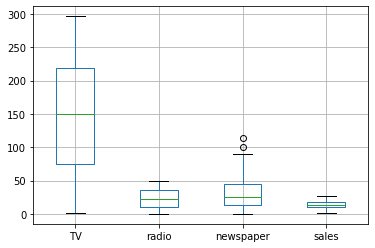

In [127]:
data.boxplot()
plt.show()

In [128]:
data["TV"].min()

0.7

In [129]:
data["TV"].max()

296.4

In [134]:
data["newspaper"].isnull().sum()

0

In [136]:
data["newspaper"]

0      69.2
1      45.1
2      69.3
3      58.5
4      58.4
       ... 
195    13.8
196     8.1
197     6.4
198    66.2
199     8.7
Name: newspaper, Length: 200, dtype: float64

In [ ]:
# min value =  Q1  - 1.5 * IQR 
# max value = Q3 + 1.5 * IQR
# IQR = Q3 - Q1
# Q1 = 25% quntile
# Q3 = 75% quantile


In [147]:
Q1 = data["newspaper"].quantile(0.25)
Q1

12.750000000000002

In [148]:
Q3= data["newspaper"].quantile(0.75)
Q3

45.1

In [149]:
IQR = Q3-Q1
IQR

32.35

In [150]:
min_val = Q1 - 1.5*IQR
min_val

-35.775000000000006

In [151]:
max_val = Q1 + 1.5*IQR
max_val

61.275000000000006

In [177]:
len(data[["newspaper"]][((data[["newspaper"]] < min_val)  | (data[["newspaper"]] > max_val)).any(axis = 1)] )

18

In [167]:
data[["newspaper"]] < min_val

,newspaper
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False


In [169]:
data[["newspaper"]] > max_val

,newspaper
0,True
1,False
2,True
3,False
4,False
...,...
195,False
196,False
197,False
198,True


In [178]:
data[["newspaper"]][((data[["newspaper"]] < min_val)  | (data[["newspaper"]] > max_val)).any(axis = 1)]

,newspaper
0,69.2
2,69.3
5,75.0
12,65.9
16,114.0
75,89.4
85,65.7
87,63.2
88,73.4
93,72.3
